In [2]:
import requests
from urllib.request import urlretrieve
import re
from bs4 import BeautifulSoup
import random
import time
import spacy


# Finding urls for the songs of retrospective artists


In [3]:
artists_urls = ["https://www.lyrics.com/artist/Christina-Aguilera/357293",
                'https://www.lyrics.com/artist/Britney-Spears/320976'] 


In [4]:
href_lyrics_index = []

for index,a in enumerate(artists_urls):

        callingURL =requests.get(a)
        #Splitting the artist Link only for the artist name
        k= re.findall('artist.(.+?).\d+',(artists_urls[index]))[0]
        #Replacing special characters with dots for the search 
        k= re.sub('[^A-Za-z0-9]+', '.', k)
        html_text_index= callingURL.text
        #Making search pattern generalized for multiple requests
        fu = 'href=..lyric.\d+.'+k +'.[^\"]+'
        #Finding all songs from the html-text
        lyrics_href = re.findall(fu, html_text_index)
        rand_items = random.sample(lyrics_href, 100)

        for i in range (0, 100):
                h = 'https://www.lyrics.com'+(rand_items[i][6:])
                href_lyrics_index.append(h)
          

# Creating files, sending requests, Is it possible to send 

In [ ]:
for i in href_lyrics_index:
    time.sleep(3)
    a = requests.get(i)
    k= re.sub('[^A-Za-z0-9]+', '',i)
    html_file = open(f'{k[23:]}',"w")
    html_file.write(a.text)
    html_file.close()  

In [2]:
#Creating files with the name of the files for each artist
lyrics_C =href_lyrics_index[0:100]
lyrics_B = href_lyrics_index[101:]

lyrics_index_C = []
lyrics_index_B = []

for i in lyrics_C:
    k= re.sub('[^A-Za-z0-9]+', '',i)[23:]
    lyrics_index_C.append(k) 
    
    
for i in lyrics_B:
    k= re.sub('[^A-Za-z0-9]+', '',i)[23:]
    lyrics_index_B.append(k) 


NameError: name 'href_lyrics_index' is not defined

# Corpus: Aggregating all the files of each artist into one corpus

# Is it possible to write a function in here?

In [244]:
def creating_list(lyrics):

    Lorpus = []

    for i in lyrics:                     
                     
        html = open('/Users/paulinebrucki/Documents/SPICED/500-Week4/'+i)
        soup = BeautifulSoup(html, 'html.parser')
        tables = soup.find_all(class_='lyric-body') 

        # k is a list of index for each Song
        doc = []
        for t in tables:
                s = t.text.replace('\n',' ')
                doc.append(s)  

    
        Lorpus.append(doc)    
        
    return Lorpus


Lorpus_C = creating_list(lyrics_index_C)
Lorpus_B = creating_list (lyrics_index_B)

In [1]:
#For Training the Model
Lorpus_Total = Lorpus_C[0:50] + Lorpus_B[0:50]



NameError: name 'Lorpus_C' is not defined

In [194]:
#Creating Label
labels_C = list('C'*50)
labels_B = list('B'*50) 
labels= labels_C + labels_B


100

# Applying CountVectorizer, TfidF and Naive Bayes

In [179]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [180]:
m = CountVectorizer(stop_words= 'english')


In [181]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

m.fit(Lorpus_Total)

matrix = m.fit_transform(Lorpus_Total)
index = list(sorted(m.vocabulary_.keys()))

df_Total = pd.DataFrame(matrix.todense(), columns = index).T.sort_values(by = 0, ascending = False)




In [182]:
df_Total.head()

0   1   2   3   4   5   6   7   8   9  ...  90  91  92  93  94  95  \
love      5   2   0  12   0   0   0   0   0   0 ...   6   1   0   4   0   1   
hope      5   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   3   0   
holding   5   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   
breathe   4   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   
need      3   0   3   0   0   0   0   0   0   0 ...   0  12   0   7   0   0   

         96  97  98  99  
love      9   0   1   1  
hope      0   0   0   0  
holding   0   0   0   0  
breathe   0   0   0   0  
need      0   0   1   6  

[5 rows x 100 columns]

In [183]:
tf = TfidfTransformer()


In [184]:
vec = tf.fit_transform(matrix)


In [185]:
vec.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [186]:
from sklearn.naive_bayes import MultinomialNB

In [187]:
X= vec

y = labels


In [188]:
mc = MultinomialNB()
mc.fit(X, y)

mc.score(X, y)

0.97

In [162]:
#Creating TestDataSet

In [189]:
#testsongs= (random.sample(Lorpus_C, 15))+(random.sample(Lorpus_B, 15))
testsongs = Lorpus_C[60:75] + Lorpus_B[60:75]


In [220]:
test_vec = m.transform(testsongs)
test_vec = tf.transform(test_vec)

In [221]:
mc.predict(test_vec)

array(['B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'C'], dtype='<U1')

In [222]:
mc.predict_proba(test_vec)

array([[0.5748338 , 0.4251662 ],
       [0.65760394, 0.34239606],
       [0.57377588, 0.42622412],
       [0.64854896, 0.35145104],
       [0.59004278, 0.40995722],
       [0.52687052, 0.47312948],
       [0.43308551, 0.56691449],
       [0.27509198, 0.72490802],
       [0.37272206, 0.62727794],
       [0.48258576, 0.51741424],
       [0.57395138, 0.42604862],
       [0.56058798, 0.43941202],
       [0.62609832, 0.37390168],
       [0.53163041, 0.46836959],
       [0.6181747 , 0.3818253 ],
       [0.56777808, 0.43222192],
       [0.60240874, 0.39759126],
       [0.53933205, 0.46066795],
       [0.56758271, 0.43241729],
       [0.69259221, 0.30740779],
       [0.69450929, 0.30549071],
       [0.5695044 , 0.4304956 ],
       [0.5571775 , 0.4428225 ],
       [0.53450606, 0.46549394],
       [0.51523779, 0.48476221],
       [0.69528782, 0.30471218],
       [0.55182248, 0.44817752],
       [0.62564121, 0.37435879],
       [0.77838242, 0.22161758],
       [0.44109453, 0.55890547]])

# What are the feature which are most disciminating?

In [223]:
one = mc.feature_log_prob_[0]
two = mc.feature_log_prob_[1]

diff = one - two

In [225]:
import pandas as pd

df = pd.DataFrame(diff, index= list(sorted(m.vocabulary_.keys())) ).sort_values(by=0, ascending=False)

0
gimme        1.036398
prerogative  0.819607
chorus       0.709275
everybody    0.702939
tell         0.679251
aw           0.676026
maybe        0.663087
baby         0.638654
believe      0.638497
boom         0.629733
luv          0.605024
pretty       0.595897
loneliness   0.594927
womanizer    0.593525
guess        0.593340
killing      0.581315
say          0.572138
try          0.560661
glass        0.550305
spend        0.545316
hear         0.544676
hoo          0.534222
someday      0.527803
alright      0.517365
run          0.517269
toxic        0.510677
touch        0.508288
just         0.507820
mind         0.504242
live         0.502429
...               ...
por         -0.457305
jagger      -0.460481
moves       -0.460481
times       -0.461213
save        -0.462830
light       -0.464613
sky         -0.474200
pop         -0.475976
arms        -0.476199
single      -0.493710
beautiful   -0.497551
today       -0.498305
unless      -0.500993
girl        -0.501288
sing        -0.520846
stand       -0.529824
matter      -0.544810
miracle     -0.549786
rise        -0.565705
feeling     -0.581892
ohh         -0.623974
happy       -0.651852
tu          -0.654387
que         -0.665781
bring       -0.681152
free        -0.696228
christmas   -0.709165
merry       -0.728997
es          -0.739963
mi          -0.782819

[1987 rows x 1 columns]

# Latent Dirichlet Allocation to identify 10 common ‘topics’ 

In [46]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

lda_B = LatentDirichletAllocation(n_components=10)
lda_C = LatentDirichletAllocation(n_components=10)

lda_B.fit(matrix_B)
lda_C.fit(matrix_C)


/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [47]:
bB = lda_B.components_
cC= lda_C.components_

In [49]:
bB.shape
cC.shape
ctrans = cC.T
btrans = bB.T

In [51]:
words_B = list(sorted(m.vocabulary_.keys()))
df_B1 = pd.DataFrame(btrans, index=words_B)

In [53]:
words_C = list(sorted(l.vocabulary_.keys()))
df_C1 = pd.DataFrame(ctrans, index=words_C)

In [227]:
# 10 Topics for Britney Spears

for i in range(10):
    print(df_B1.sort_values(by=i, ascending=False)[i].head(10))
    print('-' * 40)

oh       428.663310
baby     280.457665
just     262.699459
don      260.292996
gimme    225.369829
know     220.747010
like     214.726141
want     209.689577
yeah     178.683374
got      170.867786
Name: 0, dtype: float64
----------------------------------------
oh       5.934607
baby     4.021856
gimme    3.290623
don      3.225799
know     2.692858
just     2.677511
like     2.352842
yeah     2.274400
want     2.184179
make     1.581393
Name: 1, dtype: float64
----------------------------------------
oh       2.086244
don      1.262348
just     1.224366
baby     1.206587
like     1.099284
want     0.967414
love     0.950738
gimme    0.880885
yeah     0.873309
got      0.809750
Name: 2, dtype: float64
----------------------------------------
oh       0.621986
baby     0.609954
just     0.521034
know     0.497360
don      0.481963
gimme    0.452768
like     0.418633
got      0.418616
want     0.415571
come     0.408140
Name: 3, dtype: float64
----------------------------------------


In [55]:
# 10 Topics for Christina Aguillera

for i in range(10):
    print(df_C1.sort_values(by=i, ascending=False)[i].head(10))
    print('-' * 40)

oh           1.319120
yeah         1.151755
baby         0.893712
just         0.861498
want         0.855693
know         0.774527
don          0.748583
ll           0.705071
beautiful    0.692601
make         0.665068
Name: 0, dtype: float64
----------------------------------------
oh           2.650176
don          2.580450
yeah         2.246747
baby         1.953263
want         1.838247
just         1.605807
know         1.497951
got          1.470963
beautiful    1.341447
like         1.339762
Name: 1, dtype: float64
----------------------------------------
oh      1.231416
yeah    1.146212
come    0.963158
baby    0.928687
don     0.907474
love    0.886172
know    0.873229
ll      0.865824
just    0.746528
ooh     0.731907
Name: 2, dtype: float64
----------------------------------------
baby     0.717575
yeah     0.630961
oh       0.556468
know     0.549962
just     0.527455
want     0.522217
right    0.521741
don      0.503774
ve       0.496111
come     0.479956
Name: 3, dtype:

#  Add-ons
### * Map Of Words
### * Scrapy

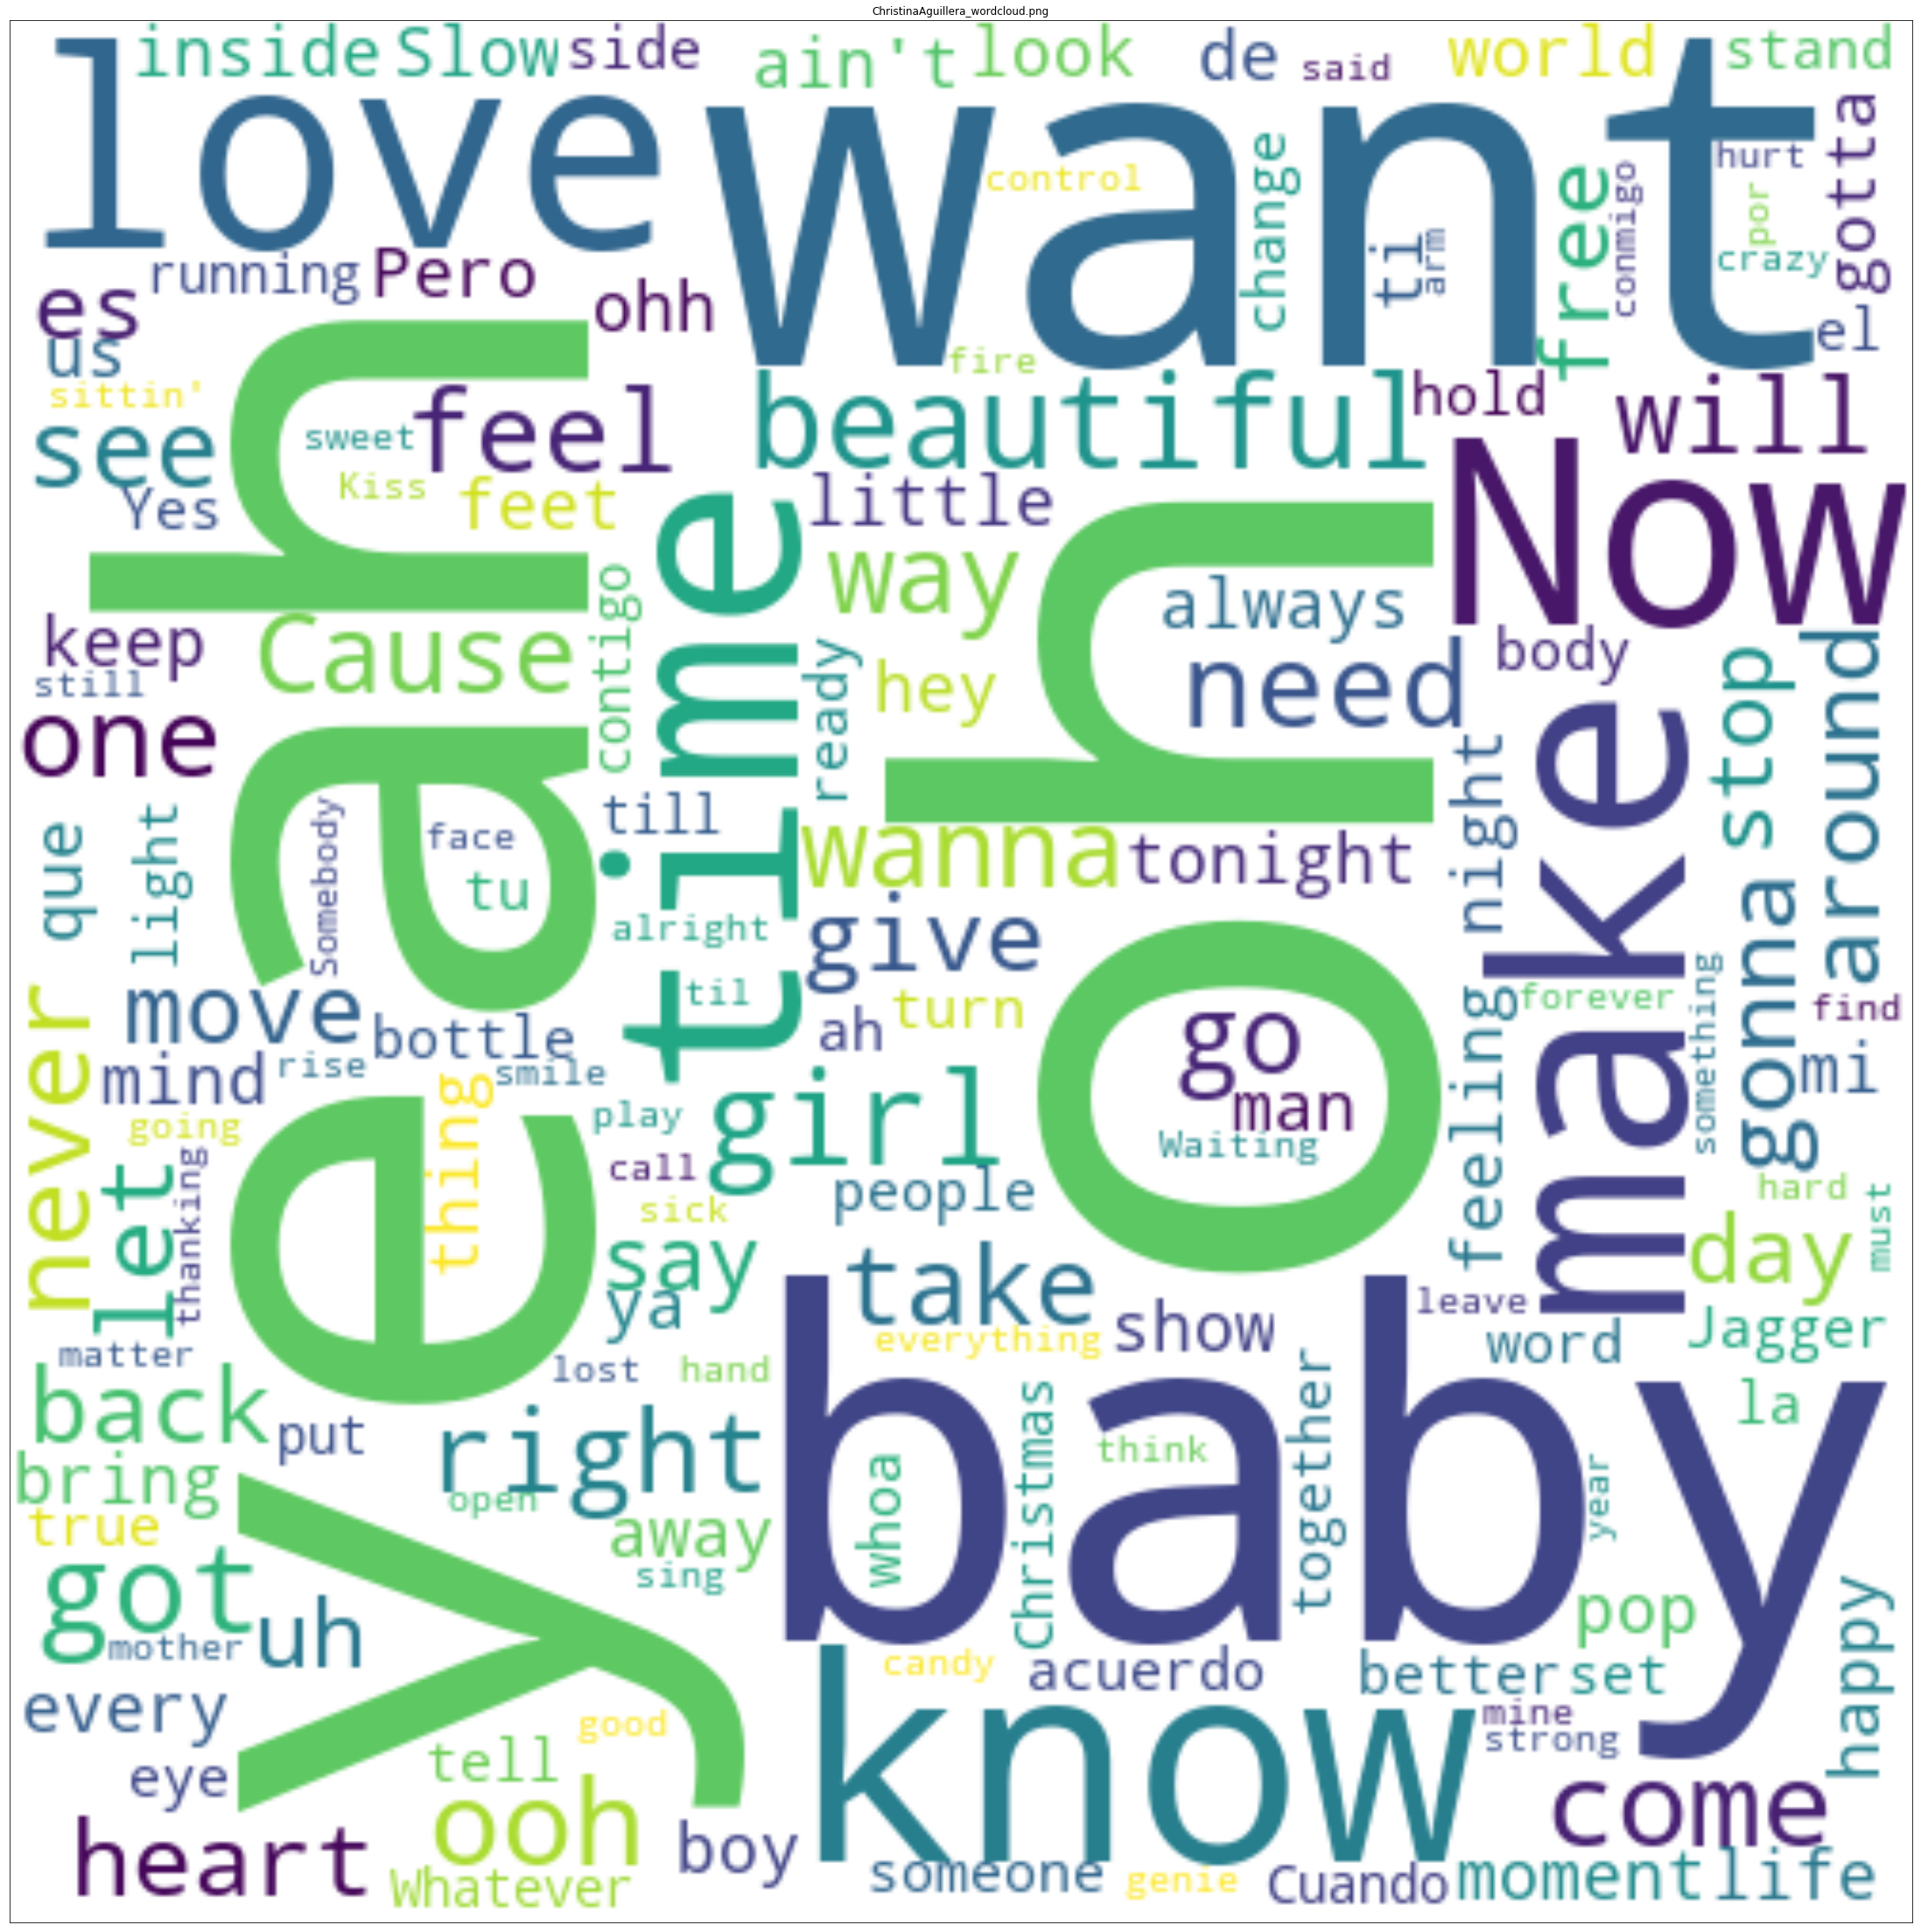

In [65]:
## Map of Words
import numpy as np
import wordcloud
import matplotlib.pyplot as plt
% matplotlib inline
lyrics = corpus_C

mask = np.zeros((500, 500, 3), np.uint8)

mask.shape

#mask[150:350,50:350,:] = 255  # masked out area

cloud = wordcloud.WordCloud(background_color="white",
                max_words=150,
                mask=mask,
                collocations=False,  # calculates frequencies
                contour_color='steelblue').generate(lyrics) # <-- lyrics is a string
                # stop words are removed!

plt.figure(figsize = (40,40))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('ChristinaAguillera_wordcloud.png')
plt.title('ChristinaAguillera_wordcloud.png')
plt.xticks([])
plt.yticks([])
plt.show()

In [90]:
# Creating the Labels for the Artists
labels_C = list('C'*100)
labels_B = list ('B'*100)

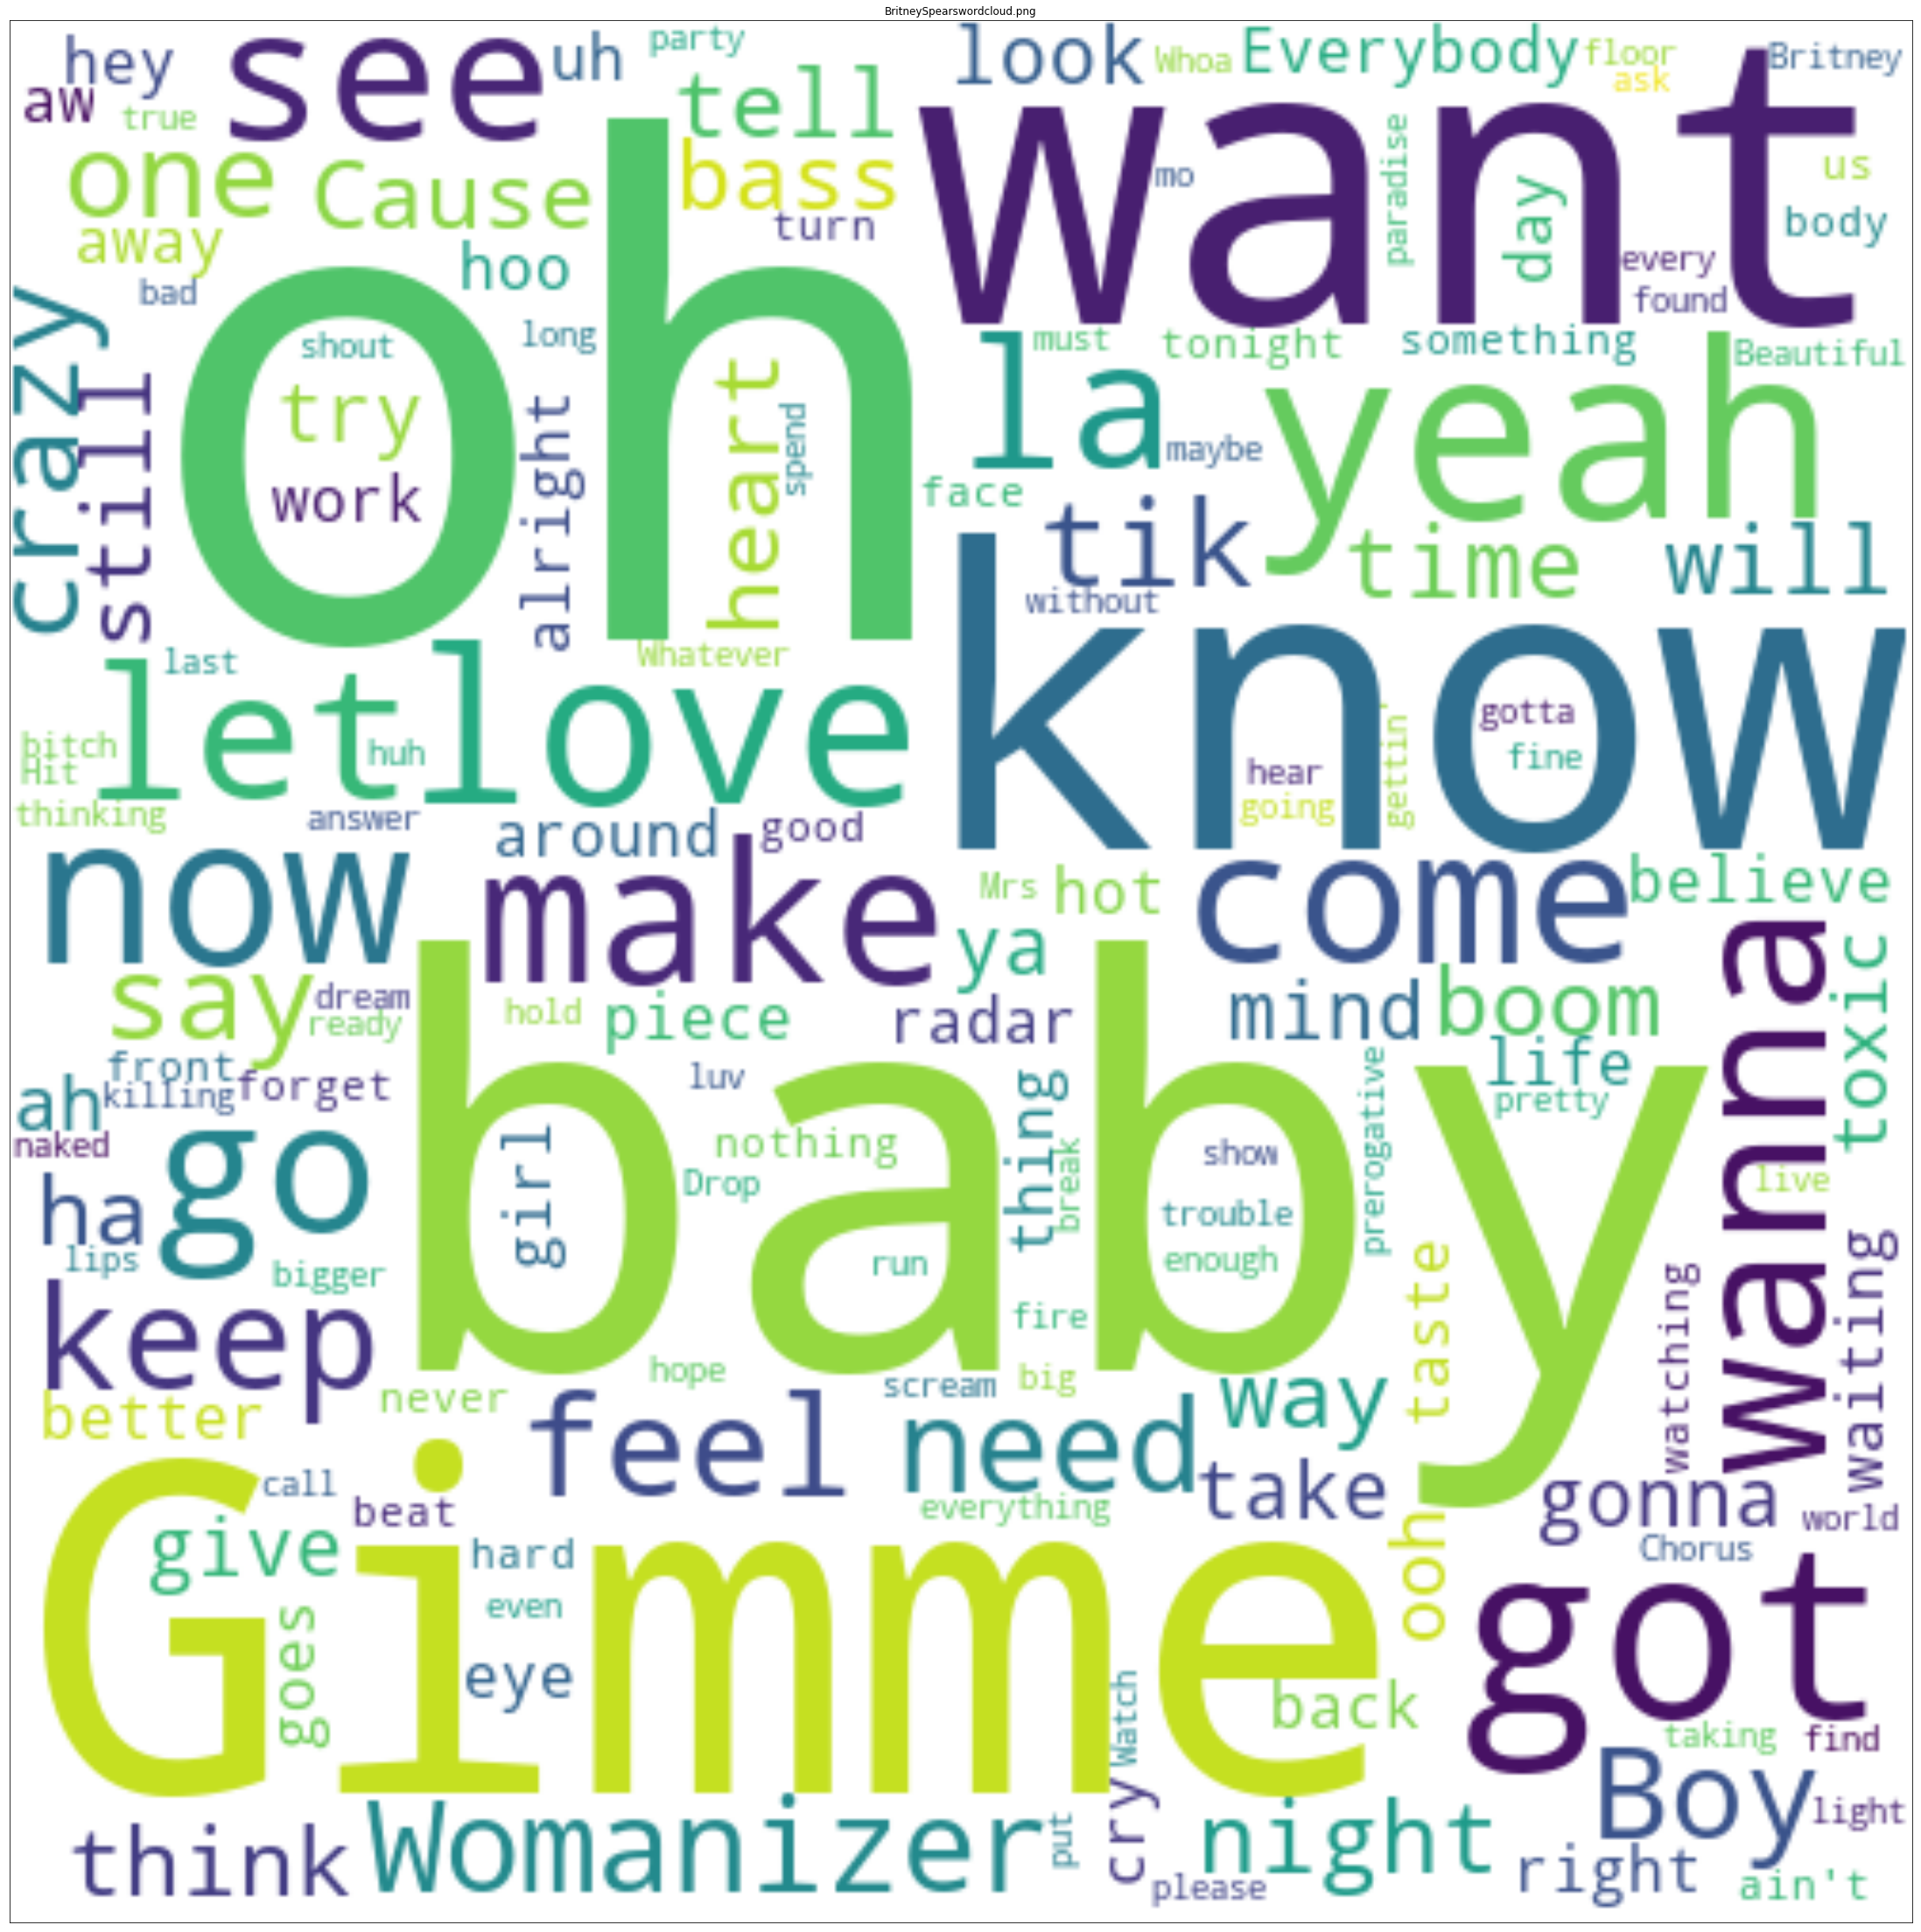

In [66]:
## Map of Words
import numpy as np
import wordcloud
import matplotlib.pyplot as plt
% matplotlib inline
lyrics = corpus_B

mask = np.zeros((500, 500, 3), np.uint8)

mask.shape

#mask[150:350,50:350,:] = 255  # masked out area

cloud = wordcloud.WordCloud(background_color="white",
                max_words=150,
                mask=mask,
                collocations=False,  # calculates frequencies
                contour_color='steelblue').generate(lyrics) # <-- lyrics is a string
                # stop words are removed!

plt.figure(figsize = (40,40))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('BritneySpears_wordcloud.png')
plt.title('BritneySpearswordcloud.png')
plt.xticks([])
plt.yticks([])
plt.show()